In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

       Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000 

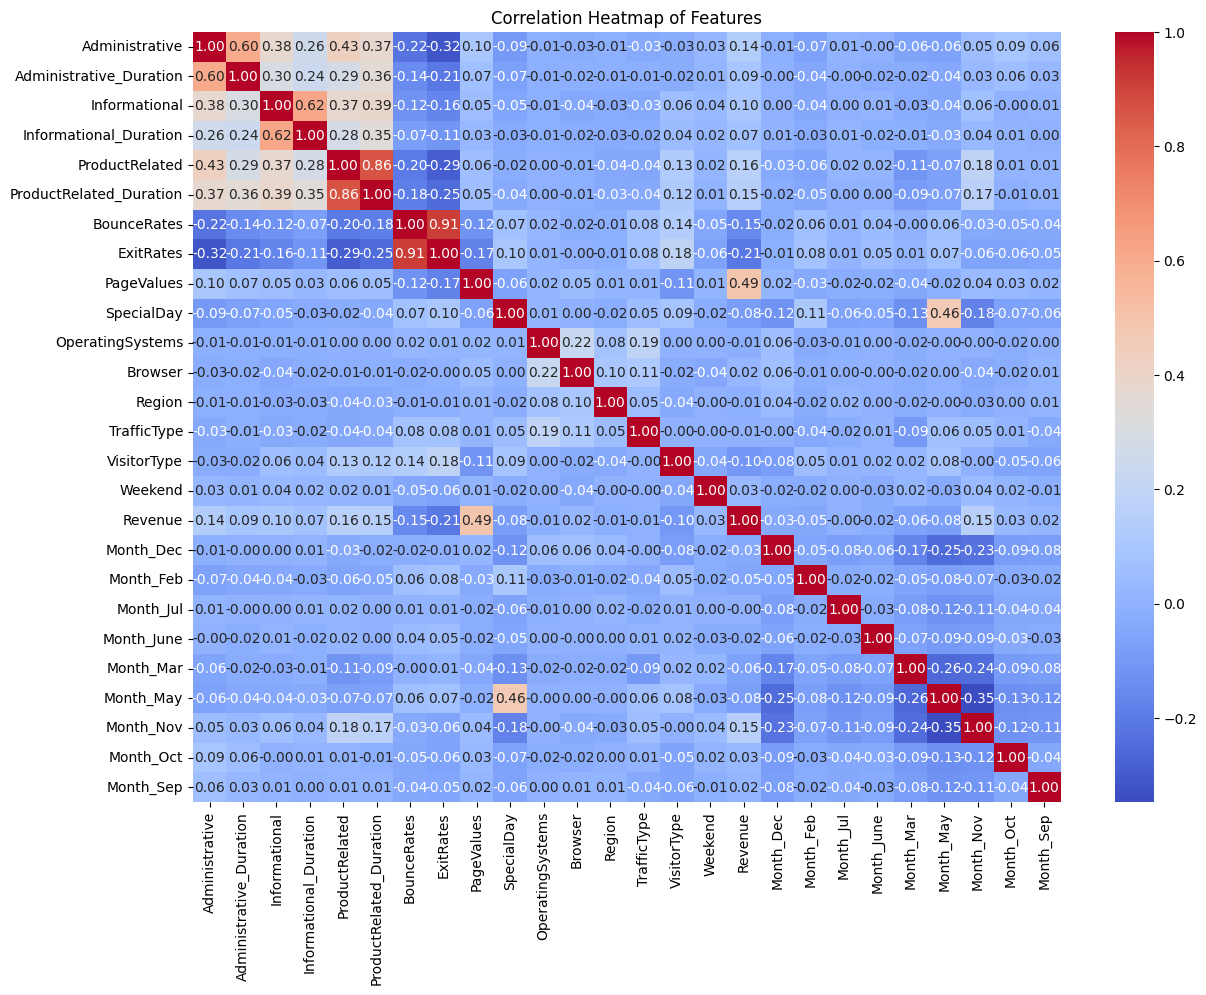

<ipython-input-45-007dee798913>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Revenue',data=data,palette='viridis')


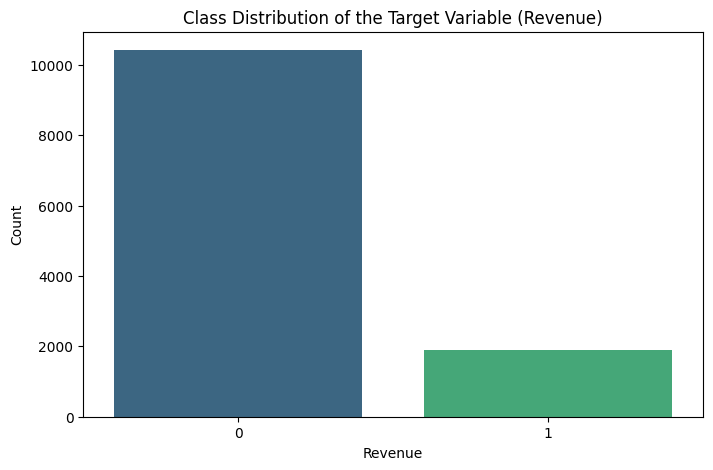

In [ ]:
#data=pd.read_csv('/content/drive/MyDrive/online_shoppers_intention.csv')
data=pd.read_csv('/online_shoppers_intention.csv')
print(data)

if 'Month' in data.columns:
    data=pd.get_dummies(data,columns=['Month'],drop_first=True)

label_clmn=['VisitorType','Weekend','Revenue']
label_encoder=LabelEncoder()

for i in label_clmn:
    data[i]=label_encoder.fit_transform(data[i])


correlation_matrix=data.corr()


plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap="coolwarm",cbar=True)
plt.title("Correlation Heatmap of Features")
plt.show()


plt.figure(figsize=(8, 5))
sns.countplot(x='Revenue',data=data,palette='viridis')
plt.title("Class Distribution of the Target Variable (Revenue)")
plt.xlabel("Revenue")
plt.ylabel("Count")
plt.show()

In [47]:
data=pd.read_csv('/content/drive/MyDrive/online_shoppers_intention.csv')
data=data.drop(['Administrative', 'Informational', 'ProductRelated'], axis=1)

##One-Hot Encoding
if 'Month' in data.columns:
    data=pd.get_dummies(data,columns=['Month'],drop_first=True)
##Label Encoding
for column in ['VisitorType','Weekend']:
    if data[column].dtype == 'object':
        label_encoder=LabelEncoder()
        data[column]=label_encoder.fit_transform(data[column])

X=data.drop('Revenue',axis=1)
Y=data['Revenue']

In [48]:
##SMOTE Oversampling
smote=SMOTE(random_state=50)
X_resampled,Y_resampled=smote.fit_resample(X,Y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [49]:
##Random Split
X_train,X_test,Y_train,Y_test=train_test_split(X_resampled,Y_resampled,test_size=0.3,random_state=50)

In [ ]:
##Stratified Split
X_train,X_test,Y_train,Y_test=train_test_split(X_resampled,Y_resampled,test_size=0.3,random_state=50,stratify=Y_resampled)

In [50]:
##MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [51]:
##Kth Nearest Neighbor
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
knn_predictions=knn.predict(X_test)
knn_accuracy=accuracy_score(Y_test,knn_predictions)
print("KNN Classification Report:\n",classification_report(Y_test,knn_predictions))

KNN Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.90      0.88      3126
        True       0.90      0.84      0.87      3128

    accuracy                           0.87      6254
   macro avg       0.87      0.87      0.87      6254
weighted avg       0.87      0.87      0.87      6254



In [52]:
##Decision Tree
dt=DecisionTreeClassifier(random_state=50)
dt.fit(X_train,Y_train)
dt_predictions=dt.predict(X_test)
dt_accuracy=accuracy_score(Y_test,dt_predictions)
print("Decision Tree Classification Report:\n",classification_report(Y_test,dt_predictions))

Decision Tree Classification Report:
               precision    recall  f1-score   support

       False       0.90      0.90      0.90      3126
        True       0.90      0.90      0.90      3128

    accuracy                           0.90      6254
   macro avg       0.90      0.90      0.90      6254
weighted avg       0.90      0.90      0.90      6254



In [53]:
##Simple Neural Network
mlp=MLPClassifier(hidden_layer_sizes=(32, 16),activation='relu',solver='adam',random_state=50,max_iter=500)
mlp.fit(X_train,Y_train)
mlp_predictions=mlp.predict(X_test)
mlp_accuracy=accuracy_score(Y_test,mlp_predictions)
print("Neural Network Classification Report:\n",classification_report(Y_test,mlp_predictions))

Neural Network Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.91      0.92      3126
        True       0.91      0.94      0.92      3128

    accuracy                           0.92      6254
   macro avg       0.92      0.92      0.92      6254
weighted avg       0.92      0.92      0.92      6254



In [54]:
##Confusion Matrices
print("KNN Confusion Matrix:\n",confusion_matrix(Y_test,knn_predictions))
print("Decision Tree Confusion Matrix:\n",confusion_matrix(Y_test,dt_predictions))
print("Neural Network Confusion Matrix:\n",confusion_matrix(Y_test,mlp_predictions))

KNN Confusion Matrix:
 [[2827  299]
 [ 508 2620]]
Decision Tree Confusion Matrix:
 [[2827  299]
 [ 307 2821]]
Neural Network Confusion Matrix:
 [[2837  289]
 [ 201 2927]]


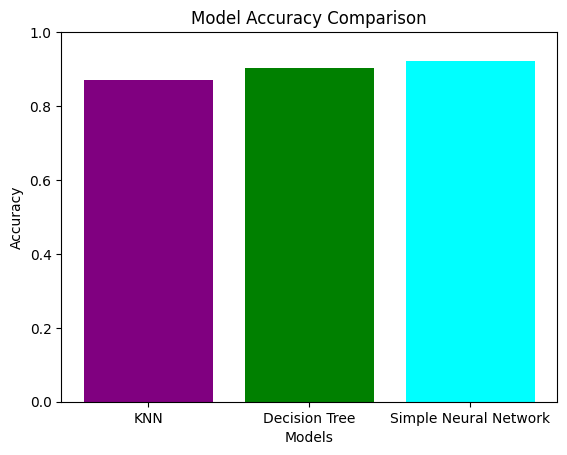

In [55]:
##Model Accuracy Comparison
models=['KNN','Decision Tree','Simple Neural Network']
accuracies=[knn_accuracy,dt_accuracy,mlp_accuracy]

plt.bar(models,accuracies,color=['purple','green','cyan'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()